In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
hour_df = pd.read_csv("hour.csv")
print("Loaded hour.csv — shape:", hour_df.shape)
display(Markdown("### Hour Dataset Head"))
display(hour_df.head())


Loaded hour.csv — shape: (17379, 17)


### Hour Dataset Head

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
def basic_clean(df, name="df"):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns.astype(str)]
    print(f"\n{name} shape: {df.shape}")
    print("Null values per column:")
    print(df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    if "dteday" in df.columns:
        df["dteday"] = pd.to_datetime(df["dteday"], errors="coerce")
        print(f"Parsed 'dteday' — Nulls:", df["dteday"].isnull().sum())
    return df
hour_df = basic_clean(hour_df, "hour_df")


hour_df shape: (17379, 17)
Null values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' — Nulls: 0


In [5]:
def fix_date_like_columns(df, cols):
    for c in cols:
        if c in df.columns:
            if np.issubdtype(df[c].dtype, np.datetime64):
                try:
                    df[c] = df[c].dt.day.astype("Int64")
                except:
                    df[c] = df[c].astype("Int64")
    return df


check_cols = ["weekday", "workingday", "holiday"]

hour_df = fix_date_like_columns(hour_df, check_cols)
for df, name in [(hour_df, "hour_df")]:
    for col in df.columns:
        if df[col].dtype == object:
            if df[col].dropna().apply(lambda x: str(x).replace('.', '', 1).isdigit()).all():
                df[col] = pd.to_numeric(df[col], errors="ignore")

print("\nUpdated dtypes (hour_df):")
display(hour_df.dtypes.head(20))



Updated dtypes (hour_df):


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [6]:
hour_clean = pd.read_csv("hour.csv")

print("Loaded hour_cleaned.csv — shape:", hour_clean.shape)

display(Markdown("### Hour Cleaned Dataset Head"))
display(hour_clean.head())


Loaded hour_cleaned.csv — shape: (17379, 17)


### Hour Cleaned Dataset Head

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


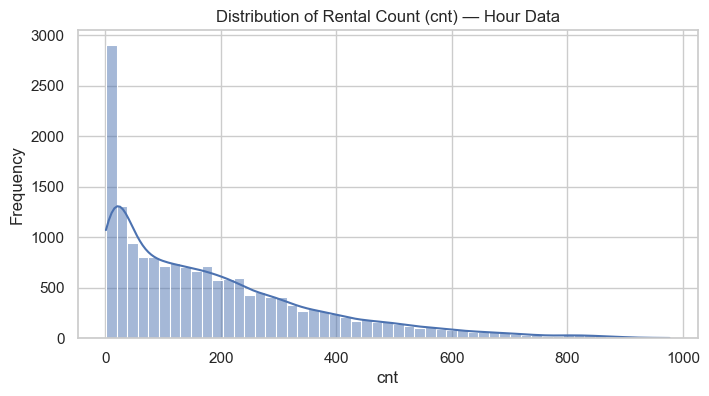

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(hour_clean["cnt"], kde=True)
plt.title("Distribution of Rental Count (cnt) — Hour Data")
plt.xlabel("cnt")
plt.ylabel("Frequency")
plt.show()

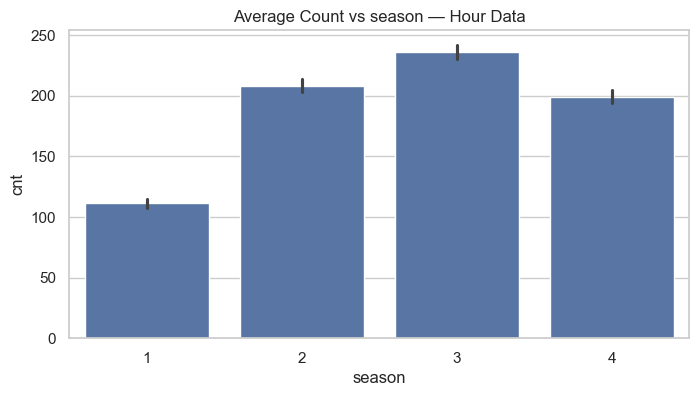

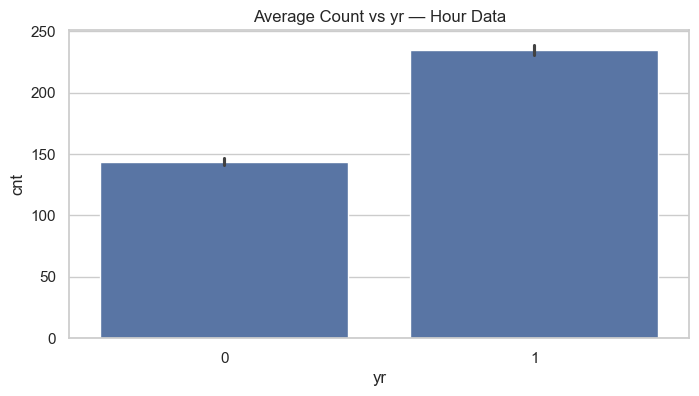

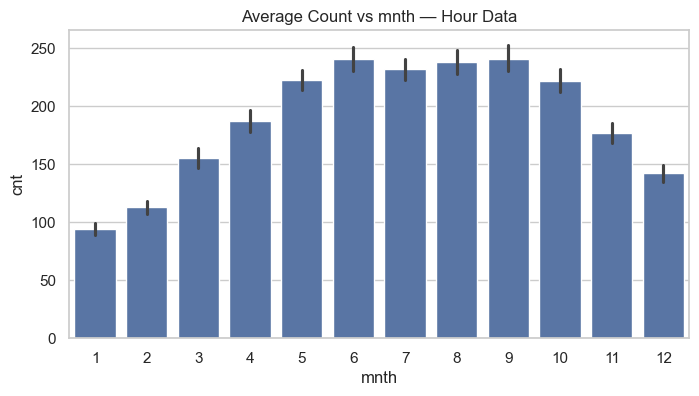

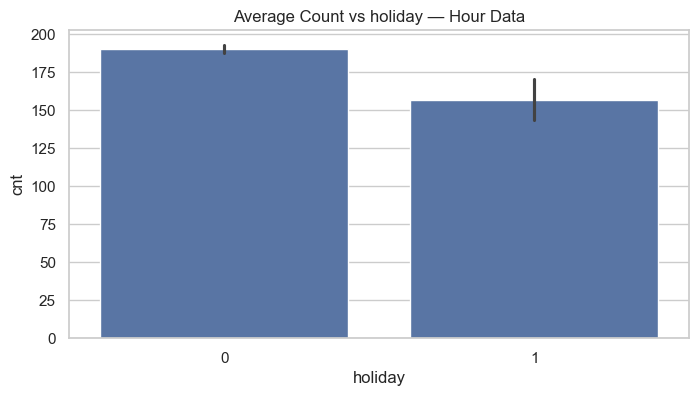

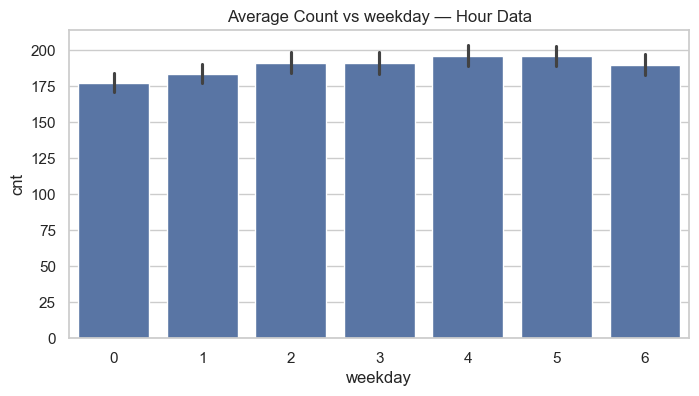

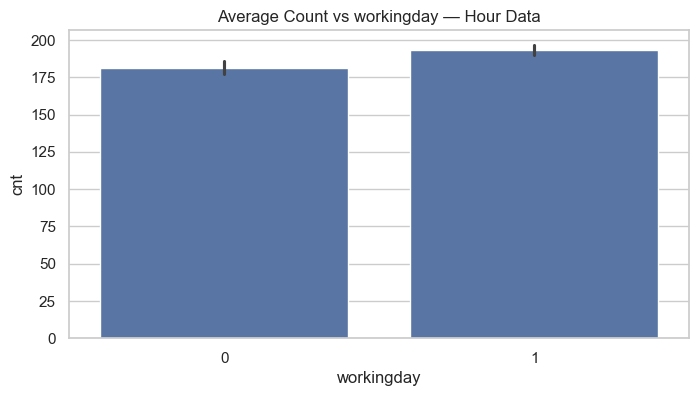

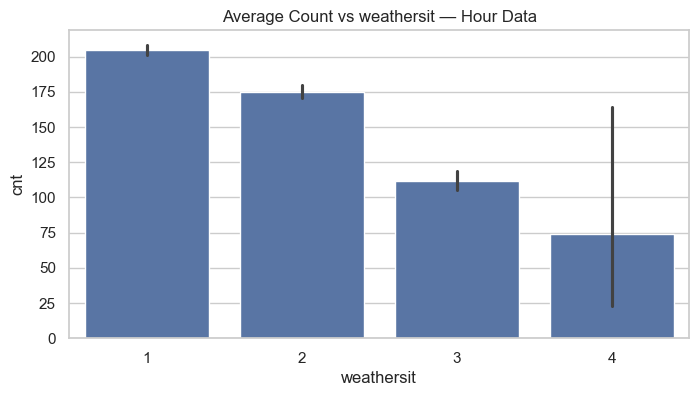

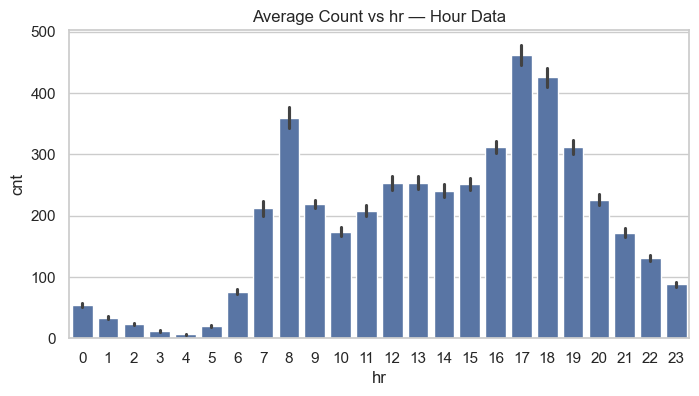

In [8]:
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "hr"]

for col in categorical_cols:
    if col in hour_clean.columns:
        plt.figure(figsize=(8, 4))
        sns.barplot(x=col, y="cnt", data=hour_clean, estimator=np.mean)
        plt.title(f"Average Count vs {col} — Hour Data")
        plt.show()

In [ ]:
if "dteday" in hour_clean.columns:
    hour_clean["dteday"] = pd.to_datetime(hour_clean["dteday"])
    plt.figure(figsize=(14, 4))
    sns.lineplot(data=hour_clean, x="dteday", y="cnt")
    plt.title("Daily Rental Trend — Aggregated View")
    plt.show() 
plt.figure(figsize=(10, 4))
sns.lineplot(data=hour_clean, x="hr", y="cnt", estimator="mean")
plt.title("Average Rentals by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.show()